# **QUERY**

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_026_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

# **Perkenalan**

Nama : Agus Susanto

Batch : RMT-26

Objective : Melakukan Clustering pada data pengguna kartu kredit

# **Conceptual Problems**

Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
```
inertia adalah suatu metrik yang mengukur seberapa besar penyebaran data di dalam suatu kluster dengan menghitung nilai total jarak antara tiap titik dengan centroid terdekatnya
```

Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

```
Elbow Method adalah metode yang digunakan dalam clustering, khususnya K-Means, untuk membantu menentukan jumlah kluster yang optimal. Metode ini membantu menghindari overfitting dan underfitting.
kelebihan metode ini adalah sederhana untuk diimplementasikan,
Sedangkan kelemahan nya adalah pada beberapa kasus, grafik tidak selalu memiliki bentuk siku yang jelas, sehingga susah menentukan jumlah kluster yang optimal, dan hasil bisa menjadi subjektif.
Cara penggunaan nya adalah menentukan total cluster yang akan di uji, hitung nilai inertia, membuat visualisasi grafik inertia dan melihat grafik inertia di mana jumlah cluster yang optimal adalah grafik dengan penurunan nilai inertia mulai melambat atau membentuk siku
```

# **Import Libraries**

In [1]:
#Library pengolahan data
import pandas as pd
import numpy as np

#Save model
import pickle
import json

#Library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk melakukan split dataframe ke data train dan test
from sklearn.model_selection import train_test_split

#Library untuk handling outlier
from feature_engine.outliers import Winsorizer

#Library untuk melakukan transformasi pada kolom dalam dataset
from sklearn.compose import ColumnTransformer

#Library untuk membuat pipeline agar proses alur kerja jadi satu
from sklearn.pipeline import Pipeline

#Library untuk melakukan scaling numeric data
from sklearn.preprocessing import RobustScaler

# Library untuk reduksi dimensi dengan PCA
from sklearn.decomposition import PCA

# Library untuk Kmeans
from sklearn.cluster import KMeans

# Library untuk menemukan jumlah cluster yang optimal
from yellowbrick.cluster import KElbowVisualizer


# **Data Loading**

In [2]:
#Import data dari csv
df = pd.read_csv('P1G6_Set_1_agus_susanto.csv')

In [3]:
#Menampilkan 10 data teratas
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [4]:
#Menampilkan 10 data terbawah
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

# **Exploratory Data Analysis (EDA)**

## **Nama Kolom Proper**
Untuk mempermudah analisis, nama kolom akan di buat menjadi proper

In [5]:
#Membuat nama kolom menjadi proper
df.columns = df.columns.str.title()

In [6]:
#Menampilkan dataframe
df

Cust_Id      Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      Installments_Purchases  Cash_Advance  Purchases_Frequency  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      Oneoff_Purchases_Frequency  Purchases_Installments_Frequency  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      Cash_Advance_Frequency  Cash_Advance_Trx  Purchases_Trx  Credit_Limit  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         Payments  Minimum_Payments  Prc_Full_Payment  Tenure  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

## **Statistic Descriptive**

In [7]:
#Membuat rangkuman statistic descriptive
df.describe().round(2)

Cust_Id   Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
count  4475.00   4475.00            4475.00    4475.00           4475.00   
mean   4476.00   1565.74               0.88    1003.16            588.50   
std    2583.93   2091.21               0.24    2210.81           1666.50   
min       2.00      0.00               0.00       0.00              0.00   
25%    2239.00    132.54               0.89      40.06              0.00   
50%    4476.00    874.91               1.00     362.48             29.99   
75%    6713.00   2058.52               1.00    1122.64            580.32   
max    8950.00  19043.14               1.00   49039.57          40761.25   

       Installments_Purchases  Cash_Advance  Purchases_Frequency  \
count                 4475.00       4475.00              4475.00   
mean                   415.03        973.45                 0.49   
std                    927.36       2133.46                 0.40   
min                      0.00          0.00                 0.00   
25%                      0.00          0.00                 0.08   
50%                     89.45          0.00                 0.50   
75%                    484.26       1098.57                 0.92   
max                  22500.00      29282.11                 1.00   

       Oneoff_Purchases_Frequency  Purchases_Installments_Frequency  \
count                     4475.00                           4475.00   
mean                         0.20                              0.36   
std                          0.30                              0.40   
min                          0.00                              0.00   
25%                          0.00                              0.00   
50%                          0.08                              0.17   
75%                          0.33                              0.75   
max                          1.00                              1.00   

       Cash_Advance_Frequency  Cash_Advance_Trx  Purchases_Trx  Credit_Limit  \
count                 4475.00            4475.0        4475.00       4474.00   
mean                     0.13               3.2          14.49       4494.02   
std                      0.20               6.5          24.16       3668.54   
min                      0.00               0.0           0.00        150.00   
25%                      0.00               0.0           1.00       1500.00   
50%                      0.00               0.0           7.00       3000.00   
75%                      0.18               4.0          17.00       6000.00   
max                      1.17             110.0         358.00      30000.00   

       Payments  Minimum_Payments  Prc_Full_Payment   Tenure  
count   4475.00           4317.00           4475.00  4475.00  
mean    1726.21            854.43              0.16    11.52  
std     2961.26           2306.41              0.30     1.35  
min        0.00              0.04              0.00     6.00  
25%      390.21            169.81              0.00    12.00  
50%      831.05            309.85              0.00    12.00  
75%     1895.96            830.40              0.17    12.00  
max    46930.60          61031.62              1.00    12.00

In [8]:
#Menampilkan ukuran dataset
df.shape

(4475, 18)

In [9]:
#Menampikan detail info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cust_Id                           4475 non-null   int64  
 1   Balance                           4475 non-null   float64
 2   Balance_Frequency                 4475 non-null   float64
 3   Purchases                         4475 non-null   float64
 4   Oneoff_Purchases                  4475 non-null   float64
 5   Installments_Purchases            4475 non-null   float64
 6   Cash_Advance                      4475 non-null   float64
 7   Purchases_Frequency               4475 non-null   float64
 8   Oneoff_Purchases_Frequency        4475 non-null   float64
 9   Purchases_Installments_Frequency  4475 non-null   float64
 10  Cash_Advance_Frequency            4475 non-null   float64
 11  Cash_Advance_Trx                  4475 non-null   int64  
 12  Purcha

In [10]:
#Menampilkan jumlah data duplicated
df.duplicated().sum()

0

### **Insight**

1. Terdapat missing value pada Credit_Limit dan Minimum_Payment, sehingga perlu di handling di feature engineer
2. Tidak terdapat duplicated data pada dataset

## **Tenure**

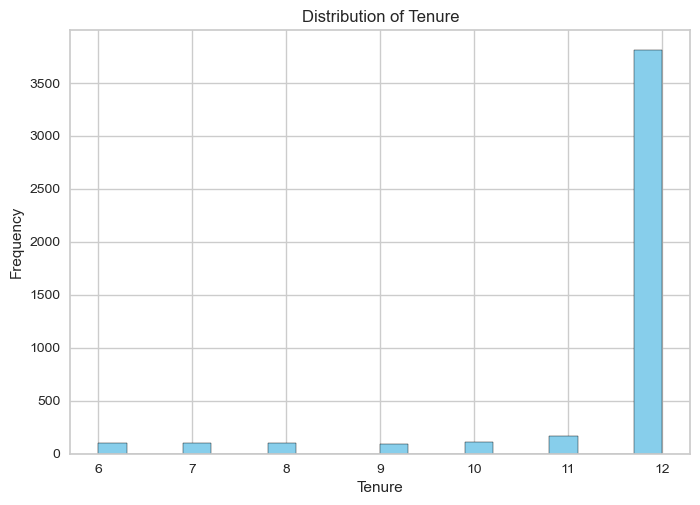

In [11]:
#Membuat histogram grafik
plt.hist(df['Tenure'], bins=20, color='skyblue', edgecolor='black')

#Menampilkan judul grafik
plt.title('Distribution of Tenure')

#Nama x label
plt.xlabel('Tenure')

#Nama y label
plt.ylabel('Frequency')

#Menampilkan grafik
plt.show()

### **Insight**

Berdasarkan grafik bahwa penggunaan kartu kredit bahwa rata-rata masa penggunaan kartu kredit adalah 12 bulan

## **Balance Vs Purchases**

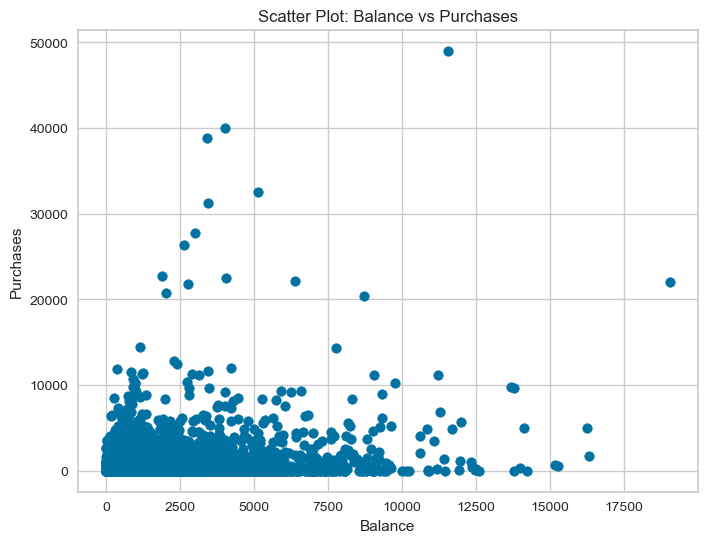

In [12]:
#Ukuran grafik
plt.figure(figsize=(8, 6))

#Membuat scatter  grafik
plt.scatter(df['Balance'], df['Purchases'])

#Menampilkan judul grafik
plt.title('Scatter Plot: Balance vs Purchases')

#Nama x label
plt.xlabel('Balance')

#Nama y label
plt.ylabel('Purchases')

#Menampilkan grafik
plt.show()

### **Insight**

Berdasarkan grafik bahwa penggunaan kartu kredit masih cukup rendah di bandingkan dengan saldo kartu kredit nya

## **Purchases vs Tenure**

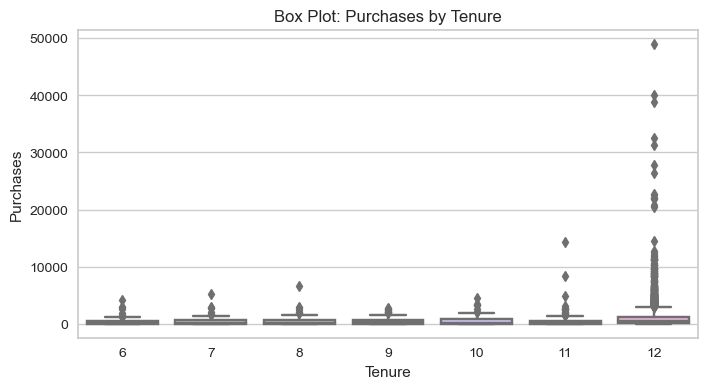

In [13]:
#Ukuran grafik
plt.figure(figsize=(8, 4))
#Membuat boxplot grafik
sns.boxplot(x='Tenure', y='Purchases', data=df, palette='pastel')
#Menampilkan judul grafik
plt.title('Box Plot: Purchases by Tenure')
#Nama x label
plt.xlabel('Tenure')
#Nama y label
plt.ylabel('Purchases')
#Menampilkan grafik
plt.show()

### **Insight**

Berdasarkan grafik bahwa pengguna dengan masa tenure 12 bulan mempunyai spending pembelian yang paling besar di antara tenure yang lain

# **Feature Engineering**

## **Handling Missing Value**

In [14]:
#Menghitung missing value pada tabel
df.isnull().sum()

Cust_Id                               0
Balance                               0
Balance_Frequency                     0
Purchases                             0
Oneoff_Purchases                      0
Installments_Purchases                0
Cash_Advance                          0
Purchases_Frequency                   0
Oneoff_Purchases_Frequency            0
Purchases_Installments_Frequency      0
Cash_Advance_Frequency                0
Cash_Advance_Trx                      0
Purchases_Trx                         0
Credit_Limit                          1
Payments                              0
Minimum_Payments                    158
Prc_Full_Payment                      0
Tenure                                0
dtype: int64

### **Insight**
Terdapat missing value pada kolom Credit_Limit dan Minimum_Payments, karena jumlah nya sedikit dari total data sehingga akan kita hapus dari data

In [15]:
#Menghapus missing value
df.dropna(inplace=True)

In [16]:
#Menghitung missing value pada tabel
df.isnull().sum()

Cust_Id                             0
Balance                             0
Balance_Frequency                   0
Purchases                           0
Oneoff_Purchases                    0
Installments_Purchases              0
Cash_Advance                        0
Purchases_Frequency                 0
Oneoff_Purchases_Frequency          0
Purchases_Installments_Frequency    0
Cash_Advance_Frequency              0
Cash_Advance_Trx                    0
Purchases_Trx                       0
Credit_Limit                        0
Payments                            0
Minimum_Payments                    0
Prc_Full_Payment                    0
Tenure                              0
dtype: int64

## **Handling Outlier**

In [17]:
#List nama kolom dengan tipe numeric
numeric_cols = ['Balance', 'Balance_Frequency', 'Purchases', 'Oneoff_Purchases', 'Installments_Purchases', 'Cash_Advance','Purchases_Frequency', 'Oneoff_Purchases_Frequency','Purchases_Installments_Frequency', 'Cash_Advance_Frequency', 'Cash_Advance_Trx', 'Purchases_Trx', 'Credit_Limit', 'Payments', 'Minimum_Payments', 'Prc_Full_Payment']

#List nama kolom dengan tipe categoric
category_cols = ['Cust_Id', 'Tenure']

In [18]:
# Dictionary sementara
skewdf = []

for i in numeric_cols:

    '''
    Looping untuk melakukan perhitungan skewness dari data numeric
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = df[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdf.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df = pd.concat(skewdf, ignore_index=True)

# menampilkan hasil dataframe
skewness_df

Feature   Skewness Skewness Category
0                            Balance   2.440901           Extreme
1                  Balance_Frequency  -2.083168           Extreme
2                          Purchases   8.902272           Extreme
3                   Oneoff_Purchases  10.045515           Extreme
4             Installments_Purchases   8.030305           Extreme
5                       Cash_Advance   4.713175           Extreme
6                Purchases_Frequency   0.035642            Normal
7         Oneoff_Purchases_Frequency   1.494505           Extreme
8   Purchases_Installments_Frequency   0.486577            Normal
9             Cash_Advance_Frequency   1.788835           Extreme
10                  Cash_Advance_Trx   4.722877           Extreme
11                     Purchases_Trx   4.429897           Extreme
12                      Credit_Limit   1.525379           Extreme
13                          Payments   5.987445           Extreme
14                  Minimum_Payments  12.356758           Extreme
15                  Prc_Full_Payment   1.854400           Extreme

In [19]:
#Handling awal satu kolom dengan category extreme distribution
wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['Balance'])
df_capped = wz.fit_transform(df)

In [20]:
#Hapus baris latitude yang sudah di handling data outlier agar tidak berulang di looping kedepan
skewness_df = skewness_df.drop(0)

In [21]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness Normal
normalcol = skewness_df.loc[skewness_df['Skewness Category'] == 'Normal', 'Feature'].tolist()
for i in normalcol:
  '''
  Looping untuk melakukan handling outlier dengan distribusi normal
  '''
  #Handling outlier
  wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
  #Fit hasil handling ke x_train
  df_capped = wz.fit_transform(df_capped)

In [22]:
#Mengambil nama kolom dalam dataframe uji skewness dengan category skewness extreme
extreemecol = skewness_df.loc[skewness_df['Skewness Category'] == 'Extreme', 'Feature'].tolist()
for i in extreemecol:
  '''
  Looping untuk melakukan handling outlier dengan skewness moderate
  '''

  #Handling outlier
  wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=[i])

  #Fit hasil handling ke x_train
  df_capped = wz.fit_transform(df_capped)

In [23]:
# Dictionary sementara
skewdfafter = []

for i in numeric_cols:

    '''
    Looping untuk melakukan perhitungan skewness dari data hasil handling outlier
    dan memasukan nya kedalam dictionary sementara
    '''

    #Menghitung skewness
    skew_val = df_capped[i].skew()

    #Round data
    round_skew = round(skew_val, 4)

    #Condition untuk nilai skewness
    skewness_category = ''
    if skew_val > 1 or skew_val < -1:
      #Jika nilai skewness >1 atau <-1 maka skewness Extreme
        skewness_category = 'Extreme'
    elif skew_val >= 0.5  or skew_val <= -0.5:
      #Jika nilai skewness >=0.5 atau <=-0.5 maka skewness moderate
        skewness_category = 'Moderate'
    else:
      #jika nilai skewness di luar dari angka else sebelum nya maka distibusi normal
        skewness_category = 'Normal'

    # membuat data setiap hasil dari looping dan condition
    skcat = pd.DataFrame({'Feature': [i], 'Skewness': [skew_val], 'Skewness Category': [skewness_category]})

    # menambahkan data hasil looping dan condition ke dictionary sementara
    skewdfafter.append(skcat)


# Concatenate menggabungkan semua dataframe looping ke satu dataframe
skewness_df_after = pd.concat(skewdfafter, ignore_index=True)

# menampilkan hasil dataframe
skewness_df_after

Feature  Skewness Skewness Category
0                            Balance  1.755424           Extreme
1                  Balance_Frequency -1.432554           Extreme
2                          Purchases  1.797555           Extreme
3                   Oneoff_Purchases  1.723017           Extreme
4             Installments_Purchases  1.769336           Extreme
5                       Cash_Advance  1.711069           Extreme
6                Purchases_Frequency  0.035642            Normal
7         Oneoff_Purchases_Frequency  1.494505           Extreme
8   Purchases_Installments_Frequency  0.486577            Normal
9             Cash_Advance_Frequency  1.773797           Extreme
10                  Cash_Advance_Trx  1.765607           Extreme
11                     Purchases_Trx  1.742907           Extreme
12                      Credit_Limit  1.468192           Extreme
13                          Payments  1.748119           Extreme
14                  Minimum_Payments  1.780386           Extreme
15                  Prc_Full_Payment  1.524826           Extreme

In [24]:
#Membuat dataframe baru dengan mengambil kolom numeric untuk di gunakan dalam model
df_capped_final = df_capped[numeric_cols]

In [25]:
#Menampilkan data
df_capped_final

Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.636364    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      Installments_Purchases  Cash_Advance  Purchases_Frequency  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      Oneoff_Purchases_Frequency  Purchases_Installments_Frequency  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      Cash_Advance_Frequency  Cash_Advance_Trx  Purchases_Trx  Credit_Limit  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                16             25        6000.0   
4474                0.545455                16             17        4000.0   

         Payments  Minimum_Payments  Prc_Full_Payment  
1      215.325023        410.484825          0.000000  
3      258.032630        151.696433          0.000000  
4      397.090516        227.143184          0.000000  
5      343.102984        712.986387          0.000000  
7       57.266292         56.720210          0.000000  
...           ...               ...               ...  
4470  1379.635287        271.364415          0.090909  
4471  4372.148648        241.645387          0.090909  
4472  1039.000037        886.050237          0.000000  
4473   905.844846       23

## **Scaling**

In [26]:
# ColumnTransofrmer untuk melakukan  proses encoding data category dan scaling data numeric
preprocessor = ColumnTransformer(
    transformers=[
        #Melakukan scaller data numeric, karena mostly data mempunyai skewness sehingga kita akan menggunakan RobustScaler
        ('num', RobustScaler(quantile_range=(25.0, 75.0)), numeric_cols)
    ],

    #argumen untuk kolom yang tidak akan di transform
    remainder='passthrough'
)

# fit transform data
df_scaled = preprocessor.fit_transform(df_capped_final)

## **PCA**

In [27]:
#PCA
pca = PCA()

#Fit PCA pada data
pca.fit(df_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

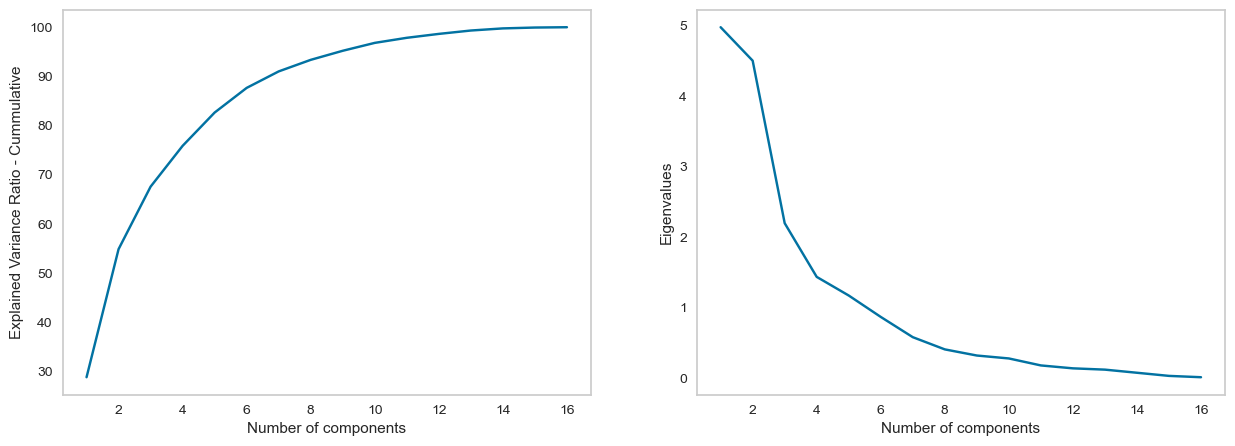

In [28]:
# Plot untuk menjelaskan Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot untuk melihat Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [29]:
# Check total feature jika ingin retain 95 % information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

9

#### **Insight**

Bedasarkan PCA data dapat di kurangi dari 18 feature menjadi 9 feature dengan keterwakilan data mencapai 95%

In [30]:
# Train dataset ke PCA
pca = PCA(n_components=0.95)
pca.fit(df_scaled)
df_scaled_pca = pca.transform(df_scaled)

# **Model Definition**

## **Using Elbow Method**

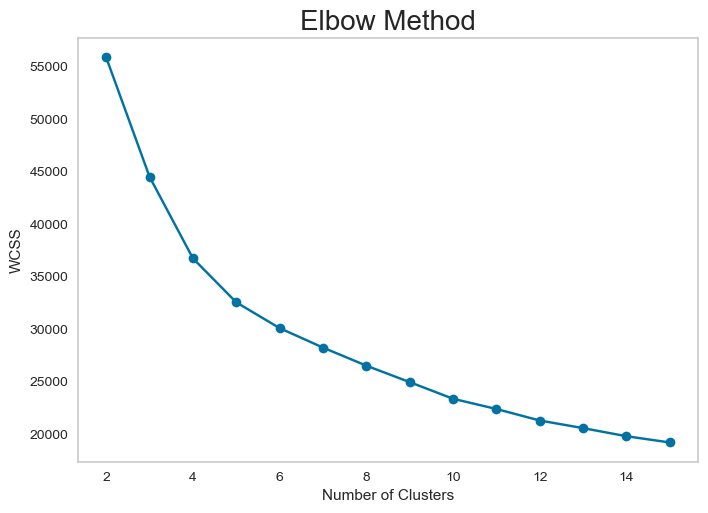

In [31]:
# Mencari optimal cluser dengan Elbow Method

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### **Insight**

Berdasarkan hasil grafik cluster yang optimal berjumlah 4,5, 6 cluster, namun akan kita uji lagi menggunakan silhoutte score dan plot untuk mendapatkan cluster yang paling bagus

## **Using Silhoutte Plot**

In [32]:
# Fungsi untik membuat Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.30068981713274917
For n_clusters = 3 The average silhouette_score is : 0.274511165010334
For n_clusters = 4 The average silhouette_score is : 0.27638865957302733
For n_clusters = 5 The average silhouette_score is : 0.2872195040809414
For n_clusters = 6 The average silhouette_score is : 0.25931658358459264
For n_clusters = 7 The average silhouette_score is : 0.2494120977554112
For n_clusters = 8 The average silhouette_score is : 0.2569081564606645
For n_clusters = 9 The average silhouette_score is : 0.260478212662178
For n_clusters = 10 The average silhouette_score is : 0.25351991373024824
For n_clusters = 11 The average silhouette_score is : 0.25580530607363333
For n_clusters = 12 The average silhouette_score is : 0.2567745646963104
For n_clusters = 13 The average silhouette_score is : 0.25699611977916675
For n_clusters = 14 The average silhouette_score is : 0.23209594344308165


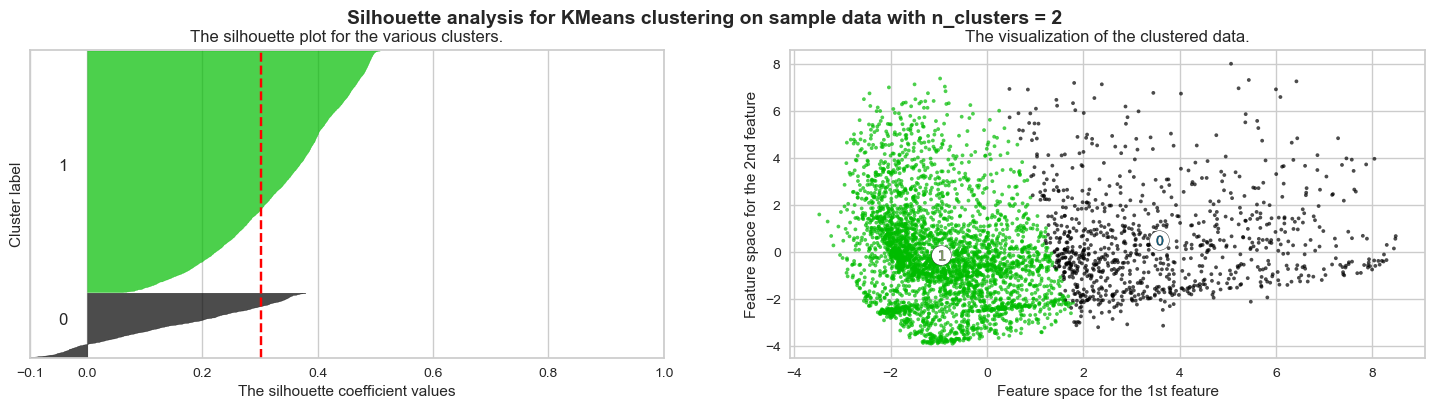

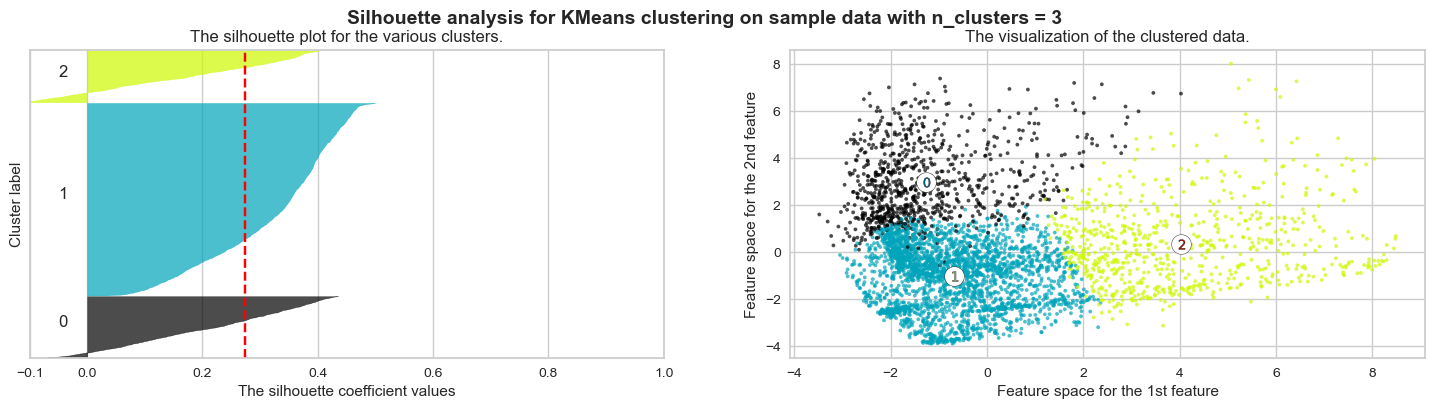

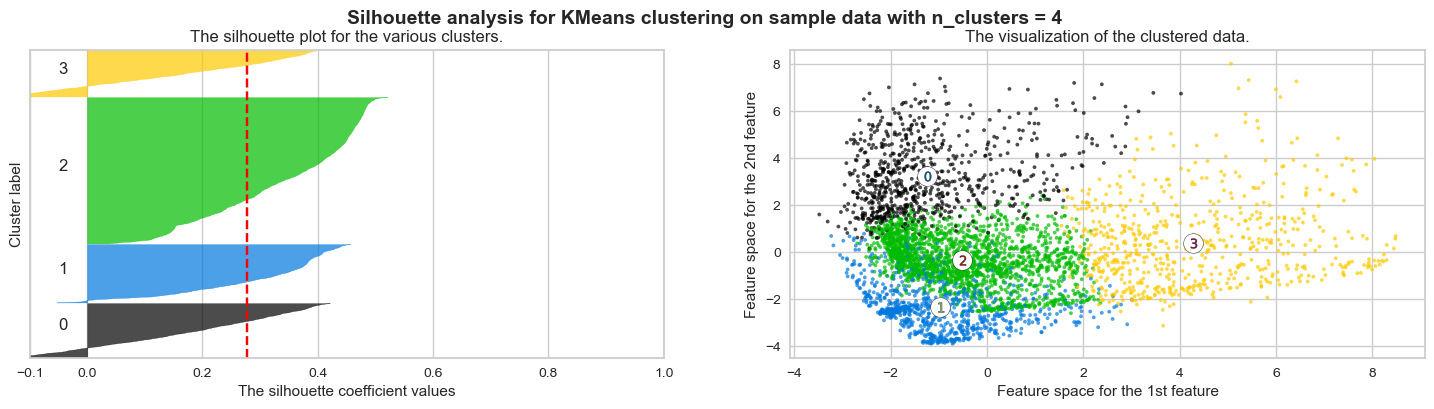

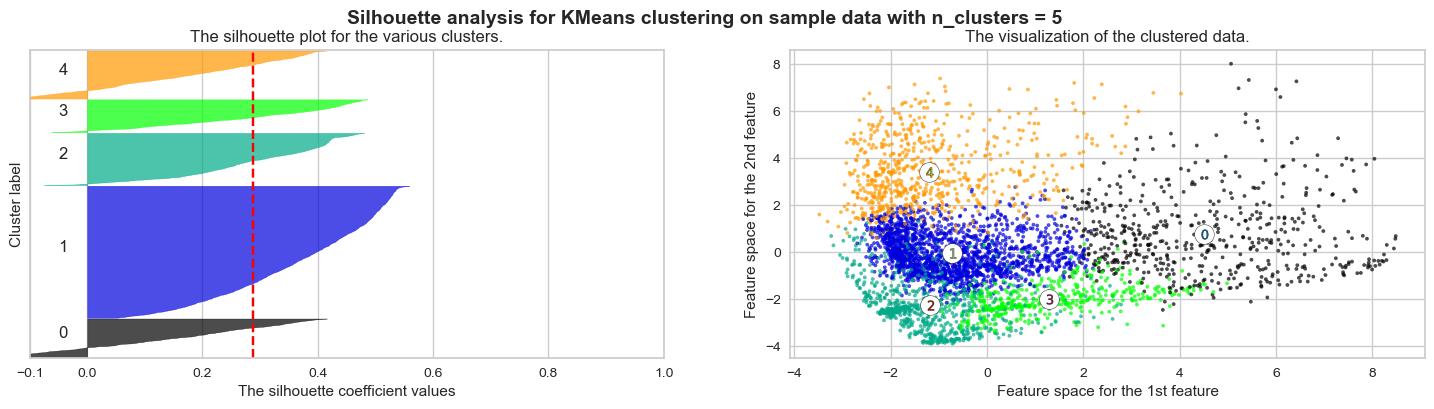

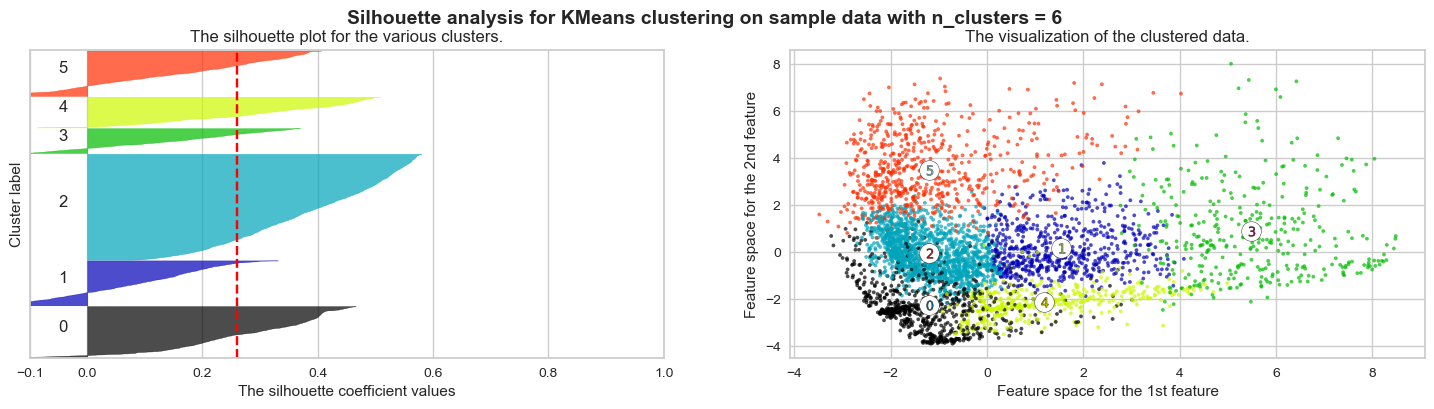

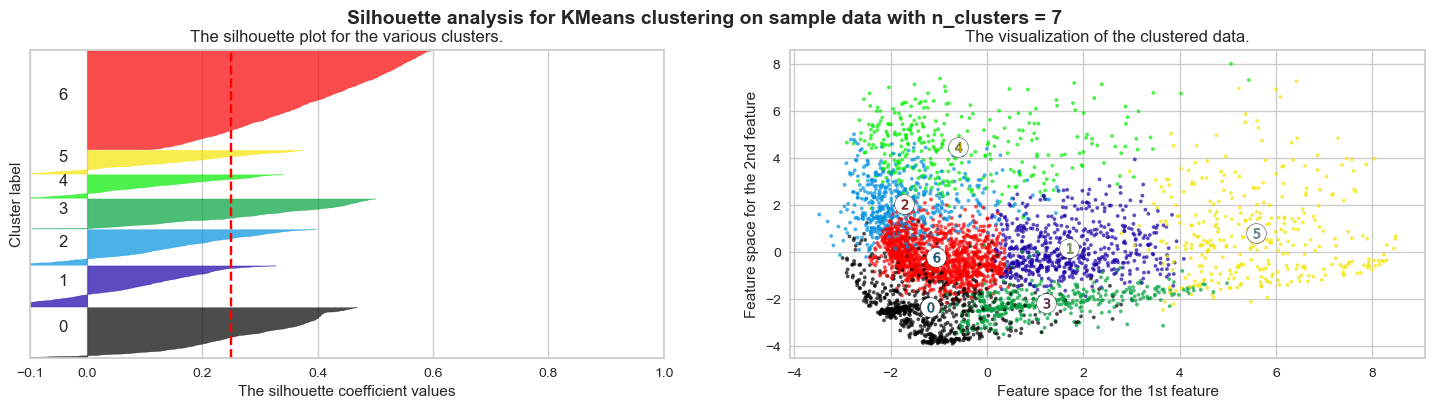

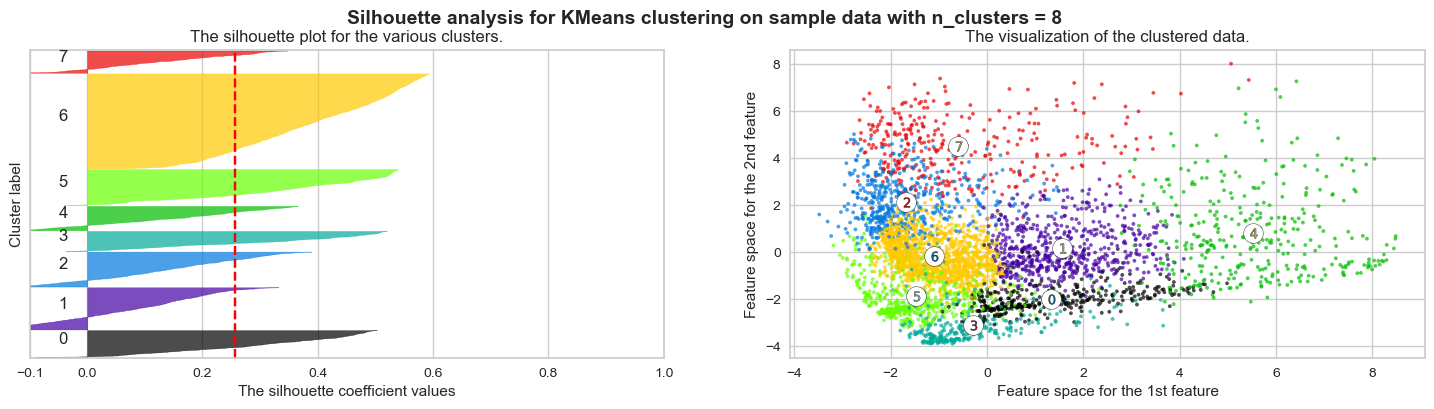

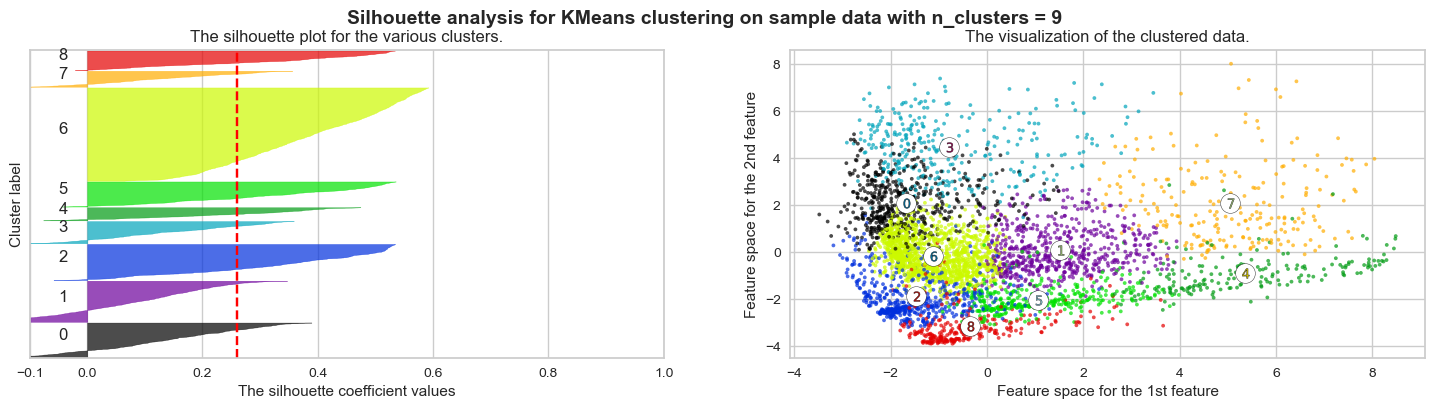

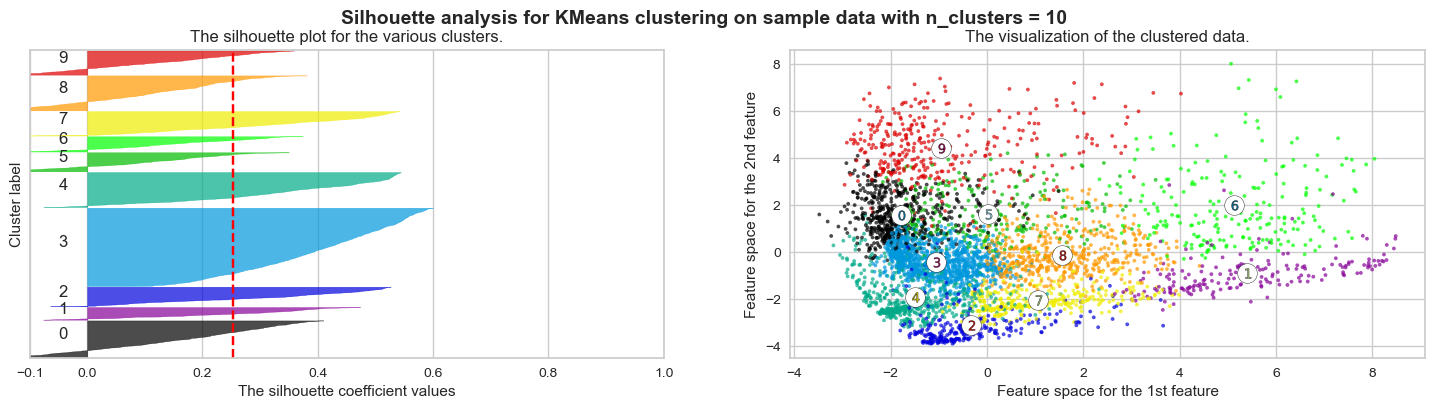

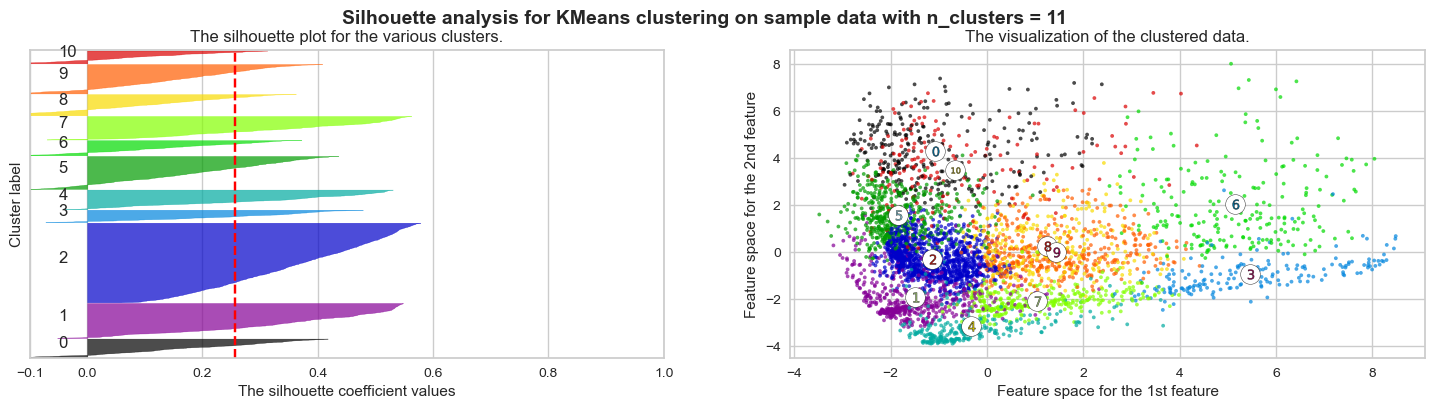

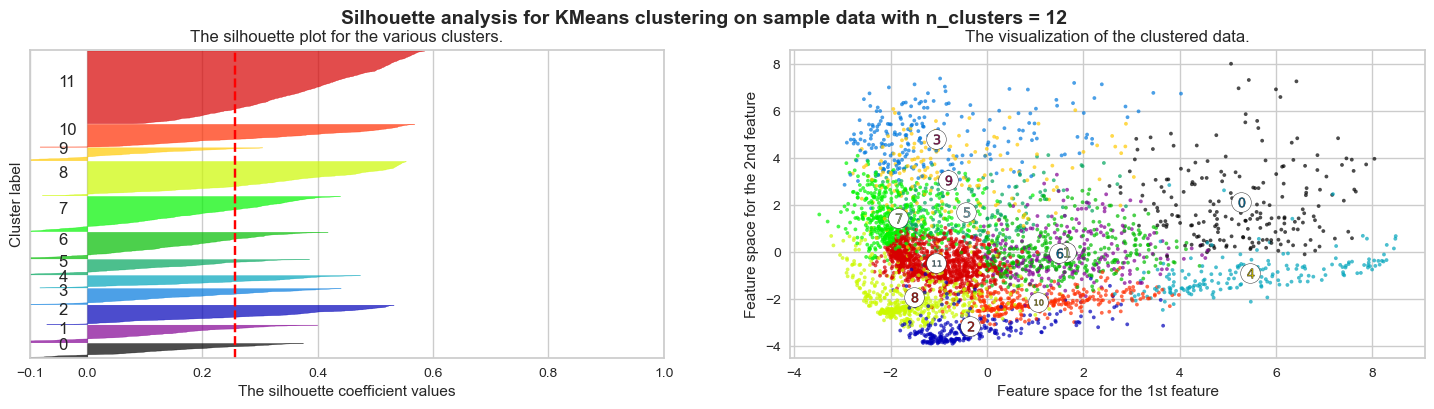

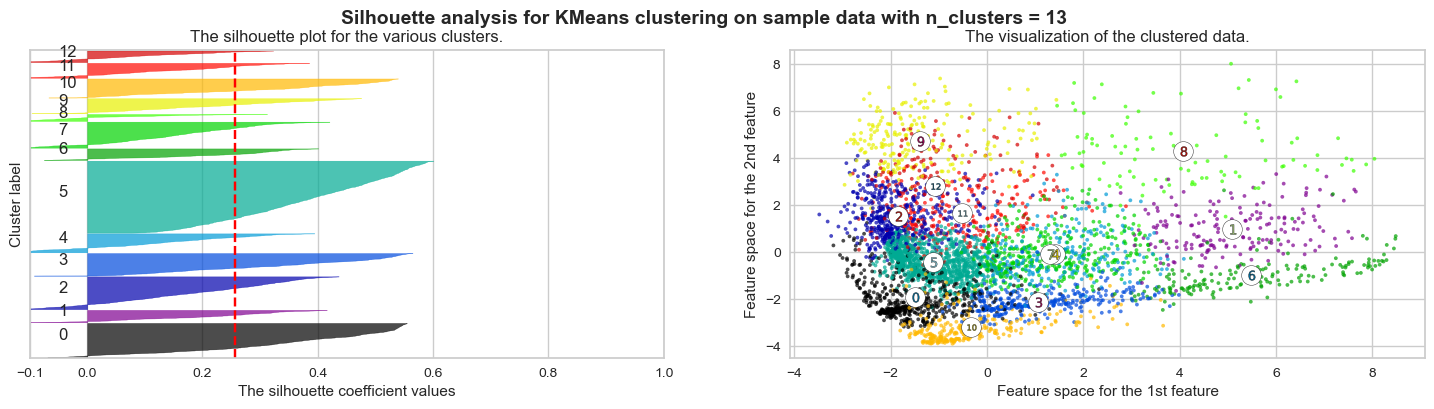

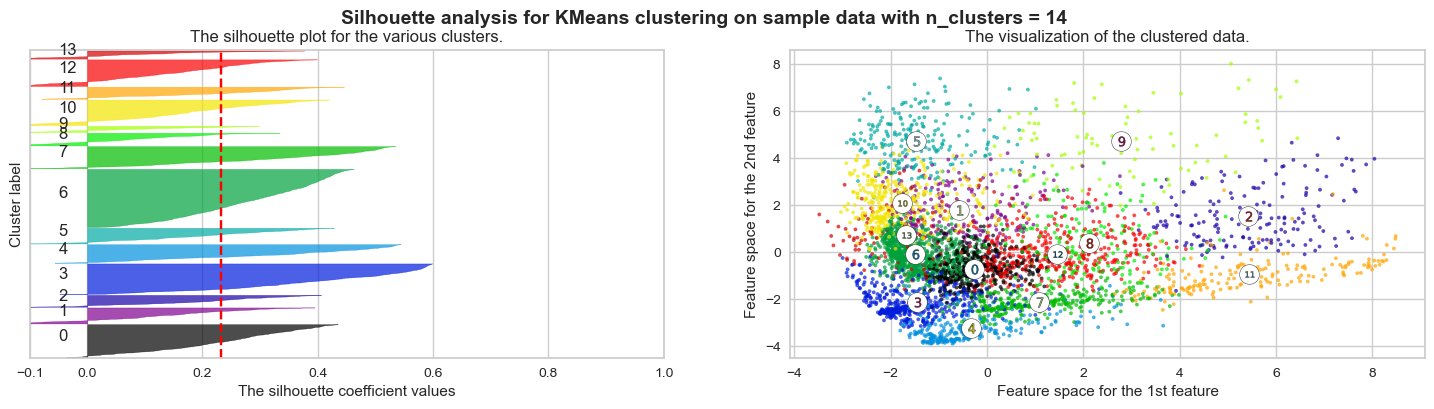

In [33]:
# MenampilkanSilhouette Score dan Silhouette Plot
plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

## **Insight**

Berdasarkan silhouette_score dapat di lihat bahwa cluster berjumlah 4 & 5 mempunyai nilai silhouette_score terbesar namun berdasarkan visualisasi akan di pilih 4 karena persebaran data lebih merata di bandingkan cluster berjumlah 5

# **Model Training**

In [34]:
# Train dataset dengan Kmeans menggunakan cluster optimal
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0])

In [35]:
# Menambahkan hasil clustering ke dataset asli

df['Cluster'] = pred


In [36]:
#Menampilkan 10 dataset teratas
df.head(10)

Cust_Id      Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
1      1902   943.584041           0.875000     103.00             103.0   
3      3426   461.455720           1.000000     585.00             585.0   
4      3976  1053.594730           1.000000    1450.00            1450.0   
5      4266  2237.238086           1.000000     120.00             120.0   
7      4680   424.994385           0.375000    1200.00            1200.0   
9        24     0.004816           0.545455      51.70               0.0   
10      172   867.728471           1.000000      41.07               0.0   
11      190    41.255670           0.454545     297.40             297.4   
12      206   857.767403           1.000000     639.56               0.0   
13      374  5850.172900           1.000000     393.87               0.0   

    Installments_Purchases  Cash_Advance  Purchases_Frequency  \
1                     0.00           0.0                0.125   
3                     0.00           0.0                0.125   
4                     0.00           0.0                0.125   
5                     0.00           0.0                0.125   
7                     0.00           0.0                0.125   
9                    51.70           0.0                0.250   
10                   41.07           0.0                0.250   
11                    0.00           0.0                0.250   
12                  639.56           0.0                0.250   
13                  393.87           0.0                0.250   

    Oneoff_Purchases_Frequency  Purchases_Installments_Frequency  \
1                        0.125                              0.00   
3                        0.125                              0.00   
4                        0.125                              0.00   
5                        0.125                              0.00   
7                        0.125                              0.00   
9                        0.000                              0.25   
10                       0.000                              0.25   
11                       0.250                              0.00   
12                       0.000                              0.25   
13                       0.000                              0.25   

    Cash_Advance_Frequency  Cash_Advance_Trx  Purchases_Trx  Credit_Limit  \
1                      0.0                 0              1        1000.0   
3                      0.0                 0              1        1000.0   
4                      0.0                 0              1        1500.0   
5                      0.0                 0              1        2500.0   
7                      0.0                 0              1        1200.0   
9                      0.0                 0              3        3000.0   
10                     0.0                 0              3        3000.0   
11                     0.0                 0              5        6000.0   
12                     0.0                 0              4        2200.0   
13                     0.0                 0              8        6000.0   

       Payments  Minimum_Payments  Prc_Full_Payment  Tenure  Cluster  
1    215.325023        410.484825          0.000000       8        2  
3    258.032630        151.696433          0.000000       8        2  
4    397.090516        227.143184          0.000000       8        2  
5    343.102984        712.986387          0.000000       8        2  
7     57.266292         56.720210          0.000000       8        1  
9     33.249088          0.059481          0.000000      12        1  
10  1409.282903        233.788637          0.000000      12        2  
11   595.460601        173.255085          0.333333      12        1  
12   210.272469        254.976679          0.000000      12        2  
13  1536.774213       2668.340809          0.000000      12        2

# **Model Evaluation**

<Axes: >

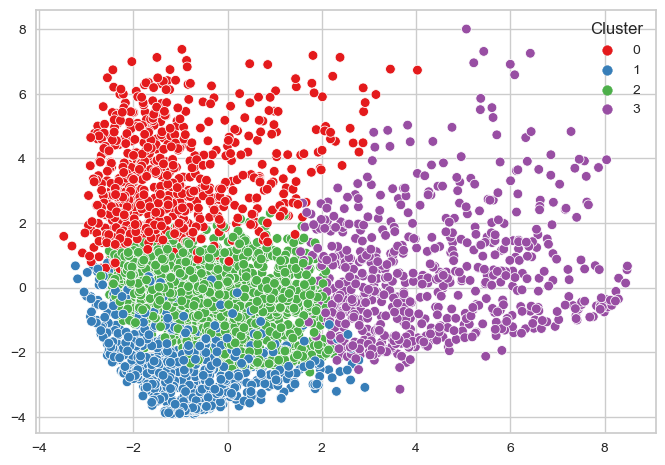

In [37]:
# Cluster visualization di 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df['Cluster'], palette='Set1')

Model mempunyai persebaran data cluster yang tersebar dengan rata walau ada data yang ikut kedalam kelompok lain namun sangat minim

## **Melihat Karakteristik Cluster**

### **Balance vs purhcase, credit_limit, payments, cash advance**

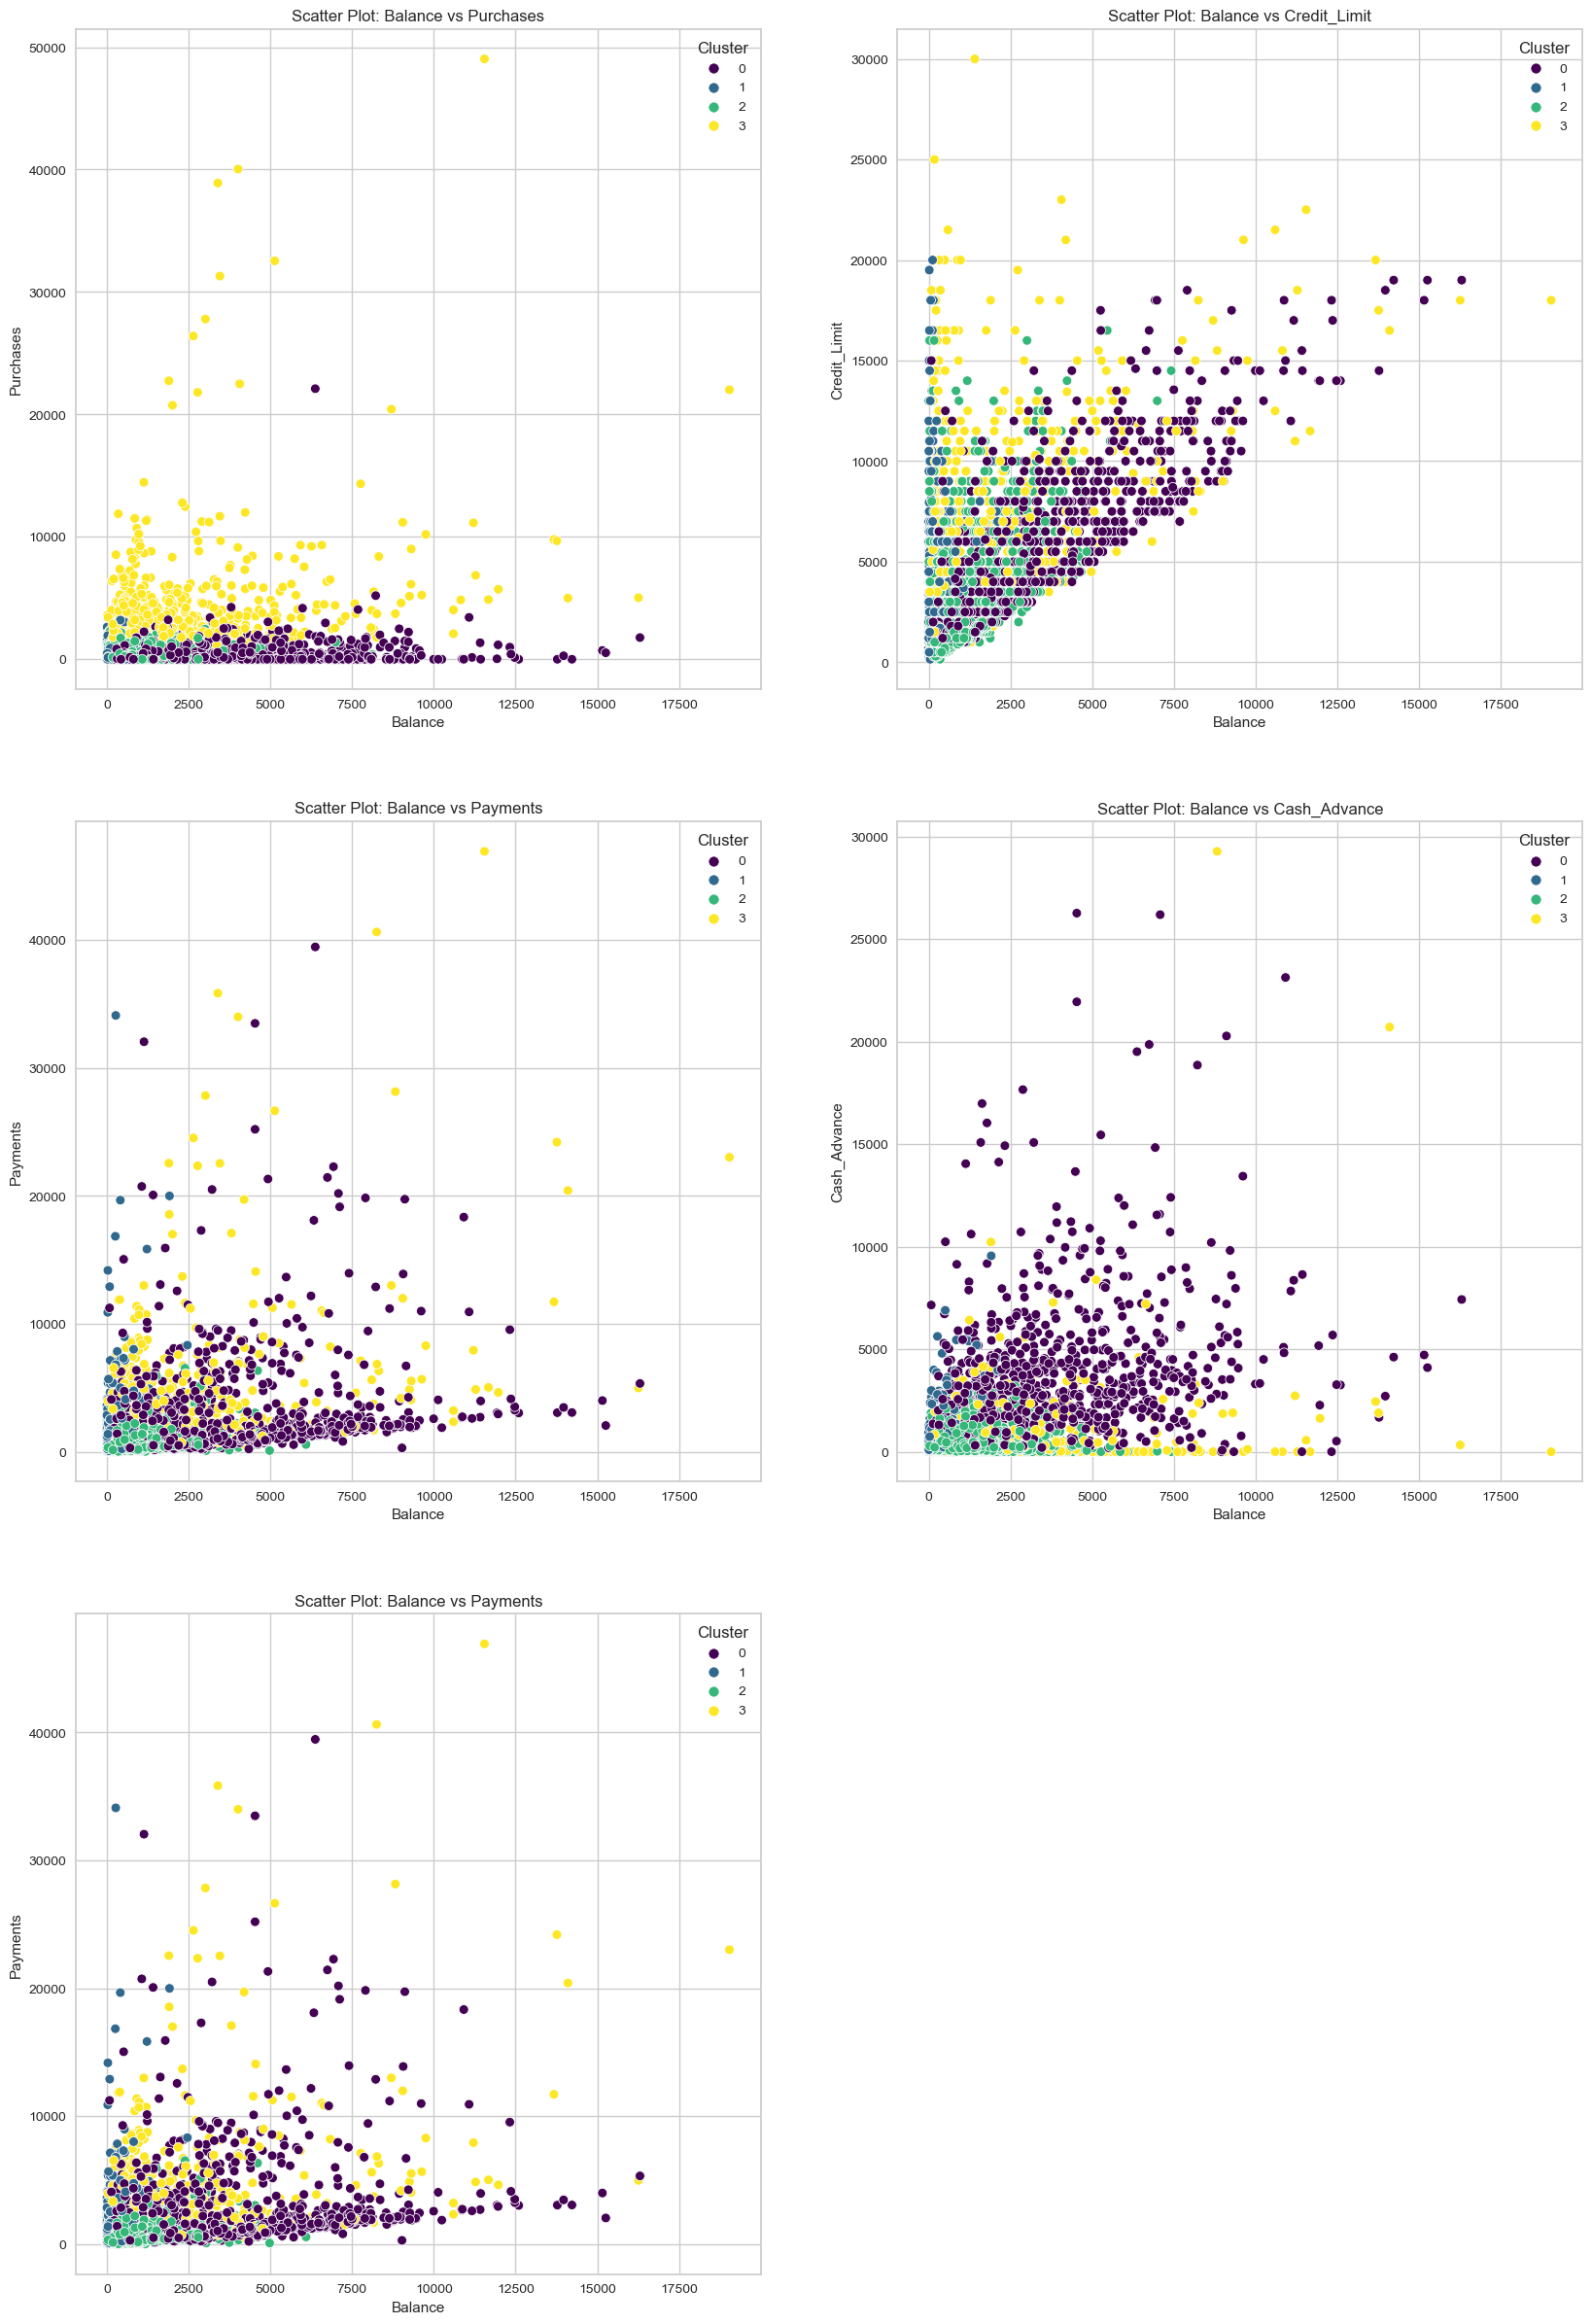

In [38]:
Cols = ['Purchases', 'Credit_Limit', 'Payments', 'Cash_Advance', 'Payments']

# Total baris grafik
num_rows = 3
# Total kolom grafik
num_cols = 2

# Ukuran gambar
figsize = (20, 30)

# Create scatter plots for each column in Cols
for index, col in enumerate(Cols):
    # Menambah subplot
    plt.subplot(num_rows, num_cols, index + 1)
    
    # Membuat scatter plot
    sns.scatterplot(data=df, x='Balance', y=col, hue='Cluster', palette='viridis', s=50)
    plt.title(f'Scatter Plot: Balance vs {col}')
    plt.xlabel('Balance')
    plt.ylabel(col)

# Menyesuaikan layout dengan jarak antar kolom dan baris yang rapi
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Menentukan ukuran gambar secara keseluruhan
plt.gcf().set_size_inches(figsize)

plt.show()

In [39]:
# Inisialisasi DataFrame kosong
result_df = pd.DataFrame()

# Loop untuk setiap cluster
for cluster_num in range(4):  # 4 karena terdapat 4 cluster (0, 1, 2, 3)
    cluster_df = df[df['Cluster'] == cluster_num]
    cluster_des = cluster_df[['Balance', 'Purchases', 'Cash_Advance']].describe().round(2).loc[['mean']]
    
    # Menambahkan kolom 'Cluster' untuk identifikasi cluster
    cluster_des['Cluster'] = cluster_num
    
    # Menambahkan ke Dataset utama
    result_df = pd.concat([result_df, cluster_des])

# Menata ulang indeks Dataset
result_df = result_df.reset_index(drop=True)

# Menampilkan Dataset
result_df

Balance  Purchases  Cash_Advance  Cluster
0  4030.71     438.42       3957.37        0
1   175.37     439.91        361.60        1
2  1104.59     485.11        313.14        2
3  2134.64    4172.84        442.01        3

#### **Insight**

Berdasarkan grafik persebaran data pada hasil model bahwa balance dan purchase mempunyai hubungan untuk masing-masing cluster :

1. **Cluster 0** adalah Balance tinggi, purchase rendah dan cash_advance tinggi, atau pada cluser ini pengguna kartu kredit cenderung memiliki saldo kartu kredit tinggi, namun ada kecenderungan untuk tidak melakukan pembelian tetapi banyak melakukan penarikan tunai
2.  **Cluster 1** adalah Balance rendah, purchase rendah dan cash advance rendah, atau mencirikan pengguna dengan saldo rendah dan tidak banyak pembelian dan penarikan tunai karena keterbatasan saldo
3.  **Cluster 2** adalah Balance tinggi,  purchase rendah dan cash advance rendah, atau pada cluster ini pengguna kartu kredit tidak banyak melakukan transaksi walaupun mempunyai saldo tinggi.
4.  **Cluster 3** adalah Balance tinggi, purchase tinggi dan cash advance rendah, atau pada cluster ini pengguna kartu kredit yang memiliki saldo dan melakukan pembelian dalam jumlah tinggi. Meskipun demikian, aktivitas penarikan uang tunai tetap rendah, menunjukkan bahwa penggunaan kartu kredit fokus pada pembelian non-tunai

# **Model Saving**

In [40]:
#Menyimpan model scaler kedalam file
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)
  
#Menyimpan model pca kedalam file
with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)
  
#Menyimpan model kedalam file
with open('model.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

# **Model Inference**

In [41]:
# Membuat DataFrame acak dengan 10 baris dari df
random_data = {
    col: df[col].sample(n=30, random_state=45).values
    for col in df.columns
}
data_intf = pd.DataFrame(random_data)
data_intf.drop('Cluster', axis=1, inplace=True)

# Memastikan semua nilai dalam DataFrame dibulatkan menjadi bilangan bulat
data_intf = data_intf.round(2)

In [42]:
#Menampilkan data
data_intf

Cust_Id  Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
0      5008    83.03               1.00    2298.89            567.55   
1      8474  4804.07               1.00       0.00              0.00   
2      7508  1166.66               1.00    2452.69           1541.69   
3      4996  3106.85               1.00       0.00              0.00   
4      4534  6384.36               1.00    1856.84           1394.21   
5      1618   260.41               1.00     545.34            257.34   
6      3038    31.87               0.82     192.92            139.70   
7      2344  4612.94               0.90     158.20              0.00   
8      5228  2441.54               1.00     808.00            808.00   
9      5956  1158.91               1.00      82.90              0.00   
10       20  2610.43               1.00     512.50              0.00   
11     4150   466.72               0.83     947.21            498.01   
12     7688  1080.96               1.00     386.78            386.78   
13     5860  1717.66               1.00     209.62              0.00   
14     1986   740.38               1.00    1672.35           1571.35   
15       16   966.25               1.00     311.45            311.45   
16     2508  1168.04               0.91    1113.10            801.19   
17     4136   137.91               1.00     897.42            684.12   
18     4228    38.99               1.00     431.52            431.52   
19     6838   158.92               1.00       0.00              0.00   
20     6642    56.15               0.91     493.32            149.93   
21     3654   200.57               1.00     675.90            675.90   
22     6826  7064.55               1.00       0.00              0.00   
23     6486  2153.50               1.00    5428.77           3064.59   
24     1400   526.86               0.36       0.00              0.00   
25     2740    94.28               1.00     846.06            312.40   
26     3670  2627.18               1.00       0.00              0.00   
27     1424    18.01               0.73     130.50              0.00   
28     4850  1579.73               1.00       0.00              0.00   
29     2782     7.26               0.27      57.00             57.00   

    Installments_Purchases  Cash_Advance  Purchases_Frequency  \
0                  1731.34          0.00                 0.92   
1                     0.00       1116.13                 0.00   
2                   911.00          0.00                 0.67   
3                     0.00       3043.48                 0.00   
4                   462.63       2144.18                 0.33   
5                   288.00          0.00                 0.42   
6                    53.22          0.00                 0.17   
7                   158.20       5391.60                 0.30   
8                     0.00        959.86                 0.25   
9                    82.90       3259.28                 0.33   
10                  512.50       2771.85                 1.00   
11                  449.20          0.00                 0.83   
12                    0.00       2208.47                 0.33   
13                  209.62       1425.66                 0.67   
14                  101.00        310.81                 0.67   
15                    0.00        955.96                 0.33   
16                  311.91          0.00                 0.83   
17                  213.30          0.00                 0.92   
18                    0.00          0.00                 1.00   
19                    0.00        787.76                 0.00   
20                  343.39          0.00                 0.75   
21                    0.00          0.00                 0.42   
22                    0.00      11582.50                 0.00   
23                 2364.18       2399.57                 1.00   
24                    0.00       2359.30                 0.00   
25                  533.66          0.00                 1.00   
26              

In [43]:
#Memilih data numeric
df_intf_test = data_intf[numeric_cols]

In [44]:
#Melakukan scaling
df_intf_scaled = preprocessor.fit_transform(df_intf_test)
#Melakukan pca
pca.fit(df_intf_scaled)
df_intf_scaled_pca = pca.transform(df_intf_scaled)

#melakukan prediksi
pred = km.fit_predict(df_intf_scaled_pca)

In [45]:
# Menambahkan hasil clustering ke dataset asli

data_intf['Cluster'] = pred

In [46]:
#Menampilkan data
data_intf

Cust_Id  Balance  Balance_Frequency  Purchases  Oneoff_Purchases  \
0      5008    83.03               1.00    2298.89            567.55   
1      8474  4804.07               1.00       0.00              0.00   
2      7508  1166.66               1.00    2452.69           1541.69   
3      4996  3106.85               1.00       0.00              0.00   
4      4534  6384.36               1.00    1856.84           1394.21   
5      1618   260.41               1.00     545.34            257.34   
6      3038    31.87               0.82     192.92            139.70   
7      2344  4612.94               0.90     158.20              0.00   
8      5228  2441.54               1.00     808.00            808.00   
9      5956  1158.91               1.00      82.90              0.00   
10       20  2610.43               1.00     512.50              0.00   
11     4150   466.72               0.83     947.21            498.01   
12     7688  1080.96               1.00     386.78            386.78   
13     5860  1717.66               1.00     209.62              0.00   
14     1986   740.38               1.00    1672.35           1571.35   
15       16   966.25               1.00     311.45            311.45   
16     2508  1168.04               0.91    1113.10            801.19   
17     4136   137.91               1.00     897.42            684.12   
18     4228    38.99               1.00     431.52            431.52   
19     6838   158.92               1.00       0.00              0.00   
20     6642    56.15               0.91     493.32            149.93   
21     3654   200.57               1.00     675.90            675.90   
22     6826  7064.55               1.00       0.00              0.00   
23     6486  2153.50               1.00    5428.77           3064.59   
24     1400   526.86               0.36       0.00              0.00   
25     2740    94.28               1.00     846.06            312.40   
26     3670  2627.18               1.00       0.00              0.00   
27     1424    18.01               0.73     130.50              0.00   
28     4850  1579.73               1.00       0.00              0.00   
29     2782     7.26               0.27      57.00             57.00   

    Installments_Purchases  Cash_Advance  Purchases_Frequency  \
0                  1731.34          0.00                 0.92   
1                     0.00       1116.13                 0.00   
2                   911.00          0.00                 0.67   
3                     0.00       3043.48                 0.00   
4                   462.63       2144.18                 0.33   
5                   288.00          0.00                 0.42   
6                    53.22          0.00                 0.17   
7                   158.20       5391.60                 0.30   
8                     0.00        959.86                 0.25   
9                    82.90       3259.28                 0.33   
10                  512.50       2771.85                 1.00   
11                  449.20          0.00                 0.83   
12                    0.00       2208.47                 0.33   
13                  209.62       1425.66                 0.67   
14                  101.00        310.81                 0.67   
15                    0.00        955.96                 0.33   
16                  311.91          0.00                 0.83   
17                  213.30          0.00                 0.92   
18                    0.00          0.00                 1.00   
19                    0.00        787.76                 0.00   
20                  343.39          0.00                 0.75   
21                    0.00          0.00                 0.42   
22                    0.00      11582.50                 0.00   
23                 2364.18       2399.57                 1.00   
24                    0.00       2359.30                 0.00   
25                  533.66          0.00                 1.00   
26              

# **Pengambilan Kesimpulan**

**Kesimpulan Model**
1. Bedasarkan PCA data dapat di kurangi dari 18 feature menjadi 9 feature dengan keterwakilan data mencapai 95% 
2. Model mempunyai performance yang cukup bagus dengan jumlah cluster adalah 4
3. Model mempunyai persebaran data yang tersebar dengan rata walau ada data yang ikut kedalam kelompok lain namun sangat minim, tetapi jumlah cluster sudah mampu mengkategorikan data
4. Kelemahan dari model ini masih terdapat sedikit data yang sebaran nya tumpang tindih pada area cluster yang lain, sehingga perlu untuk mencoba dengan menggunakan cluster 3 dan 5 untuk melihat perbandingan hasil yang lebih baik

**Kesimpulan Analysis**

1. Berdasarkan analisis cluster yang di dapatkan dari model sebagai berikut :
    * **Cluster 0** atau di sebut **High Balance - Cash Spender**:
        Pengguna kartu kredit dalam Cluster 0 cenderung memiliki saldo yang tinggi namun lebih memilih untuk membatasi pembelian. namun mereka sering melakukan penarikan uang tunai

    * **Cluster 1** atau di sebut **Low Balance - Not Spender**:
        Cluster 1 mencirikan pengguna kartu kredit dengan saldo kartu kredit rendah, pembelian yang terbatas, dan minim aktivitas penarikan uang tunai, hal ini kemungkinan terjadi karena mereka menjaga penggunakan kartu kredit dikarenakan saldo yang terbatas.

    * **Cluster 2** atau di sebut **High Balance - Not Spender**:
        Pengguna kartu kredit dalam Cluster 2 memiliki saldo tinggi, namun cenderung membatasi pembelian dan aktivitas penarikan uang tunai. Mereka menjaga keseimbangan dan mengontrol penggunaan kartu kredit.

    * **Cluster 3** atau di sebut **High Balance - Shopper Spender**:
        Pengguna kartu kredit dalam Cluster 3 memiliki saldo dan melakukan pembelian dalam jumlah yang tinggi. Meskipun demikian, aktivitas penarikan uang tunai tetap rendah, menunjukkan kecenderungan untuk fokus pada pembelian non-tunai dalam jumlah besar.

2. Berdasarkan penjelasan pada poin sebelum nya perusahaan dapat fokus melakukan promosi untuk menaikan penggunaan kartu kredit pada pengguna cluster 0 dan cluster 2 dengan menawarkan Promosi, Diskon Khusus dan reward yang dapat meningkatkan penggunaan pengguna, dan secara berkala mengirim notifikasi promosi, diskon dan reward ini kepada pengguna cluster 2.
3. Untuk pengguna pada cluser 3 tawarkan kenaikan balance dengan diskon, reward yang dapat mempertahankan penggunaan kartu kredit dari pengguna dengan cluster 3.
4. Untuk pengguna pada cluster 1 lakukan edukasi tentang Keuntungan Kartu Kredit dengan bersamaan memberikan diskon dan reward yang dapat mempengaruhi pengguna untuk melakukan transaksi dan menaikan balance dari kartu kreditnya